# <span style="font-family: Verdana;color:#6D2452;">By Shynitha Muthyam</span> 

# The Sparks Foundation

# Data Science & Business Analytics Internship

## Task-2: Predicting the optimum number of clusters and representing it visually.


In [1]:
#importing the  libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
data=pd.read_csv(r"C:\Users\shynitha\Desktop\TheSparksFoundation\iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data=data.drop('Species',axis=1)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
pd.isnull(data).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

## Estimating the optimal number of clusters k  or Elbow Method

In [8]:
#importing K-Means from scikit learn
from sklearn.cluster import KMeans
WSKV=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=40)
    kmeans.fit(data)
    WSKV.append(kmeans.inertia_)

In [9]:
frame=pd.DataFrame({'Cluster':range(1,10),'WSKV':WSKV})

Text(0, 0.5, 'WSKV')

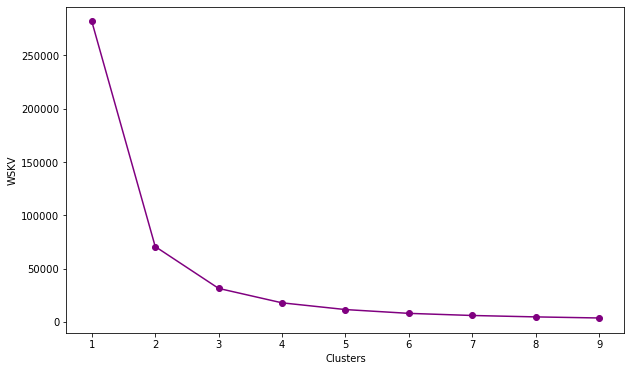

In [10]:
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'],frame['WSKV'],marker="o",color='purple')
plt.xlabel('Clusters')
plt.ylabel('WSKV')

## Creating our k-means classifier

In [11]:
X=data.iloc[:,[0,1,2,3]].values
kmeans = KMeans(n_clusters = 3,random_state = 0)
y_km = kmeans.fit_predict(X)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
pd.Series(y_km).value_counts()

2    50
1    50
0    50
dtype: int64

# Visualizing the clusters

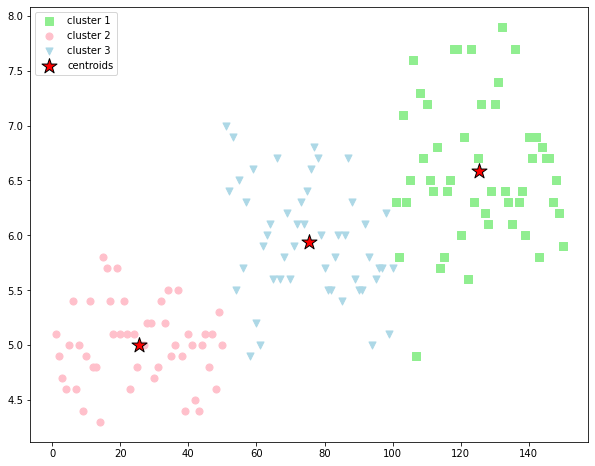

<Figure size 720x2160 with 0 Axes>

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],s=50, c='lightgreen',
    marker='s',label='cluster 1')

plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],s=50, c='pink',
    marker='o',label='cluster 2')

plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],s=50, c='lightblue',
    marker='v',label='cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.figure(figsize=(10,30))
plt.show()

### We can conclude that minimum number of clusters that can be formed are 3.

# Thank You